# UKHSA VACCINATION DATA 

## Columns and explanations

### Date:
The date associated with the vaccination data. It will allow us to track trends over time, such as daily or cumulative vaccinations.

### area_name:
The name of the geographical area, and allows us to identify the region for which vaccination data is being reported.

### metric_name
A descriptor for the dataset type.
### Age
Age group for which the data is reported (e.g., 05_11, 12_15).

### cumPeopleVaccinatedAutumn22ByVaccinationDate
Cumulative number of people vaccinated during the Autumn 2022 vaccination campaign.

### cumPeopleVaccinatedCompleteByVaccinationDate
Cumulative number of people fully vaccinated (all doses required).

### cumPeopleVaccinatedSecondDoseByVaccinationDate
Cumulative number of people who have received their second dose.

### cumPeopleVaccinatedSpring22ByVaccinationDate
Cumulative number of people vaccinated in the Spring 2022 campaign.

### cumPeopleVaccinatedSpring23ByVaccinationDate
Cumulative number of people vaccinated in the Spring 2023 campaign.

### cumPeopleVaccinatedThirdInjectionByVaccinationDate
Cumulative number of people who received a third dose or booster. This tracks booster uptake to maintain immunity.

### cumVaccinationCompleteCoverageByVaccinationDatePercentage
Percentage of the population fully vaccinated (all doses).

### cumVaccinationFirstDoseUptakeByVaccinationDatePercentage
Percentage of the population that received the first dose. This provides insight into initial vaccine rollout success.

### cumVaccinationSecondDoseUptakeByVaccinationDatePercentage
Percentage of the population that received the second dose. This tracks progression from initial to partial full vaccination.

### cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage
Percentage of the population that received a booster or third dose.

### newPeopleVaccinatedAutumn22ByVaccinationDate
Number of new people vaccinated during Autumn 2022. This measures daily progress during specific campaigns.

### newPeopleVaccinatedCompleteByVaccinationDate
Number of new people fully vaccinated on a given date. Tracks daily progress of complete vaccination efforts.

### newPeopleVaccinatedFirstDoseByVaccinationDate
Number of new people vaccinated with their first dose on a given date. Highlights initial vaccine rollout activity.

### newPeopleVaccinatedSecondDoseByVaccinationDate
Number of new people vaccinated with their second dose on a given date. Tracks daily second-dose progress.

### newPeopleVaccinatedSpring22ByVaccinationDate
Number of new people vaccinated during Spring 2022.

### newPeopleVaccinatedSpring23ByVaccinationDate
Number of new people vaccinated during Spring 2023.

### VaccineRegisterPopulationByVaccinationDate
The total population registered as eligible for vaccination on a specific date.

The dataset contains vaccination data with 168,453 rows and 21 columns which includes data on: 
 - Date,
 - area name,
 - age,
 - cumulative and new vaccination numbers across different seasons,
 - percentages for first, second, and third doses,
 - and the vaccine register population. 

The data has been studied and cleaned, however for ease of the visualisation process, I will rename the columns and reorder them. 

NOTE: The column 'cumPeopleVaccinatedCompleteByVaccinationDate' includes individuals who have been fully vaccinated, typically through second doses. This makes the column 'cumPeopleVaccinatedSecondDoseByVaccinationDate' redundant as they represent the same data, therefore, this can be removed for our analysis. 


In [3]:
# Importing all the libraries needed.

!pip install pandas
!pip install openpyxl
!pip install matplotlib 
!pip install seaborn

import matplotlib.pyplot as plt 
import seaborn as sns

import pandas as pd 

In [5]:

# Loading the dataset 
df = pd.read_csv(r'../../6_cleaned_files/ukhsa_vaccination_data/ukhsa_vaccination_data_cleaned.csv')
                   

In [6]:
# Removing the column mentioned above.
if 'cumPeopleVaccinatedSecondDoseByVaccinationDate' in df.columns:
    df.drop(columns=['cumPeopleVaccinatedSecondDoseByVaccinationDate'], inplace=True)

# Renaming the columns for ease.
df.rename(columns={
    'cumPeopleVaccinatedAutumn22ByVaccinationDate': 'Autumn22_Cumulative',
    'cumPeopleVaccinatedCompleteByVaccinationDate': 'Cumulative_Complete',
    'cumPeopleVaccinatedSpring22ByVaccinationDate': 'Spring22_Cumulative',
    'cumPeopleVaccinatedSpring23ByVaccinationDate': 'Spring23_Cumulative',
    'cumPeopleVaccinatedThirdInjectionByVaccinationDate': 'Booster_Cumulative',
    'cumVaccinationCompleteCoverageByVaccinationDatePercentage': 'Coverage_Percentage',
    'cumVaccinationFirstDoseUptakeByVaccinationDatePercentage': 'First_Dose_Percentage',
    'cumVaccinationSecondDoseUptakeByVaccinationDatePercentage': 'Second_Dose_Percentage',
    'cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage': 'Booster_Percentage',
    'newPeopleVaccinatedAutumn22ByVaccinationDate': 'New_Autumn22',
    'newPeopleVaccinatedCompleteByVaccinationDate': 'New_Complete',
    'newPeopleVaccinatedFirstDoseByVaccinationDate': 'New_First_Dose',
    'newPeopleVaccinatedSecondDoseByVaccinationDate': 'New_Second_Dose',
    'newPeopleVaccinatedSpring22ByVaccinationDate': 'New_Spring22',
    'newPeopleVaccinatedSpring23ByVaccinationDate': 'New_Spring23',
    'VaccineRegisterPopulationByVaccinationDate': 'Eligible_Population',
}, inplace=True)

# Rearranging columns for a better visual flow.
columns_order = [
    'date', 'area_name', 'age', 'Eligible_Population', 
    'Cumulative_Complete', 'Booster_Cumulative', 
    'Autumn22_Cumulative', 'Spring22_Cumulative', 'Spring23_Cumulative',
    'Coverage_Percentage', 'First_Dose_Percentage', 'Second_Dose_Percentage', 'Booster_Percentage',
    'New_Complete', 'New_First_Dose', 'New_Second_Dose', 
    'New_Autumn22', 'New_Spring22', 'New_Spring23'
]
df = df[columns_order]

# Convert 'date' to datetime and 'age' to categorical.
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['age'] = df['age'].astype('category', errors='ignore')

# Displaying to confirm the changes made.
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168453 entries, 0 to 168452
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   date                    168453 non-null  datetime64[ns]
 1   area_name               168453 non-null  object        
 2   age                     168453 non-null  category      
 3   Eligible_Population     168453 non-null  int64         
 4   Cumulative_Complete     168453 non-null  float64       
 5   Booster_Cumulative      168453 non-null  float64       
 6   Autumn22_Cumulative     168453 non-null  float64       
 7   Spring22_Cumulative     168453 non-null  float64       
 8   Spring23_Cumulative     168453 non-null  float64       
 9   Coverage_Percentage     168453 non-null  float64       
 10  First_Dose_Percentage   168453 non-null  float64       
 11  Second_Dose_Percentage  168453 non-null  float64       
 12  Booster_Percentage      168453

(None,
         date                 area_name    age  Eligible_Population  \
 0 2022-01-01  yorkshire_and_the_humber  05_11               484231   
 1 2022-01-01  yorkshire_and_the_humber  12_15               288773   
 2 2022-01-01  yorkshire_and_the_humber  16_17               137934   
 3 2022-01-01  yorkshire_and_the_humber  18_24               513378   
 4 2022-01-01  yorkshire_and_the_humber  25_29               412127   
 
    Cumulative_Complete  Booster_Cumulative  Autumn22_Cumulative  \
 0                  7.0                 0.0                  0.0   
 1               3510.0                 9.0                  0.0   
 2               4875.0                28.0                  0.0   
 3             281111.0             91939.0                  0.0   
 4             242248.0            100286.0                  0.0   
 
    Spring22_Cumulative  Spring23_Cumulative  Coverage_Percentage  \
 0                  0.0                  0.0                  0.0   
 1               

## CUMULATIVE VACCINATION TRENDS OVER TIME

Locator attempting to generate 3044 ticks ([-8370.0, ..., 176868.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3044 ticks ([-8370.0, ..., 176868.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3044 ticks ([-8370.0, ..., 176868.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3044 ticks ([-8370.0, ..., 176868.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3044 ticks ([-8370.0, ..., 176868.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3044 ticks ([-8370.0, ..., 176868.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3044 ticks ([-8370.0, ..., 176868.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3044 ticks ([-8370.0, ..., 176868.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3044 ticks ([-8370.0, ..., 176868.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting 

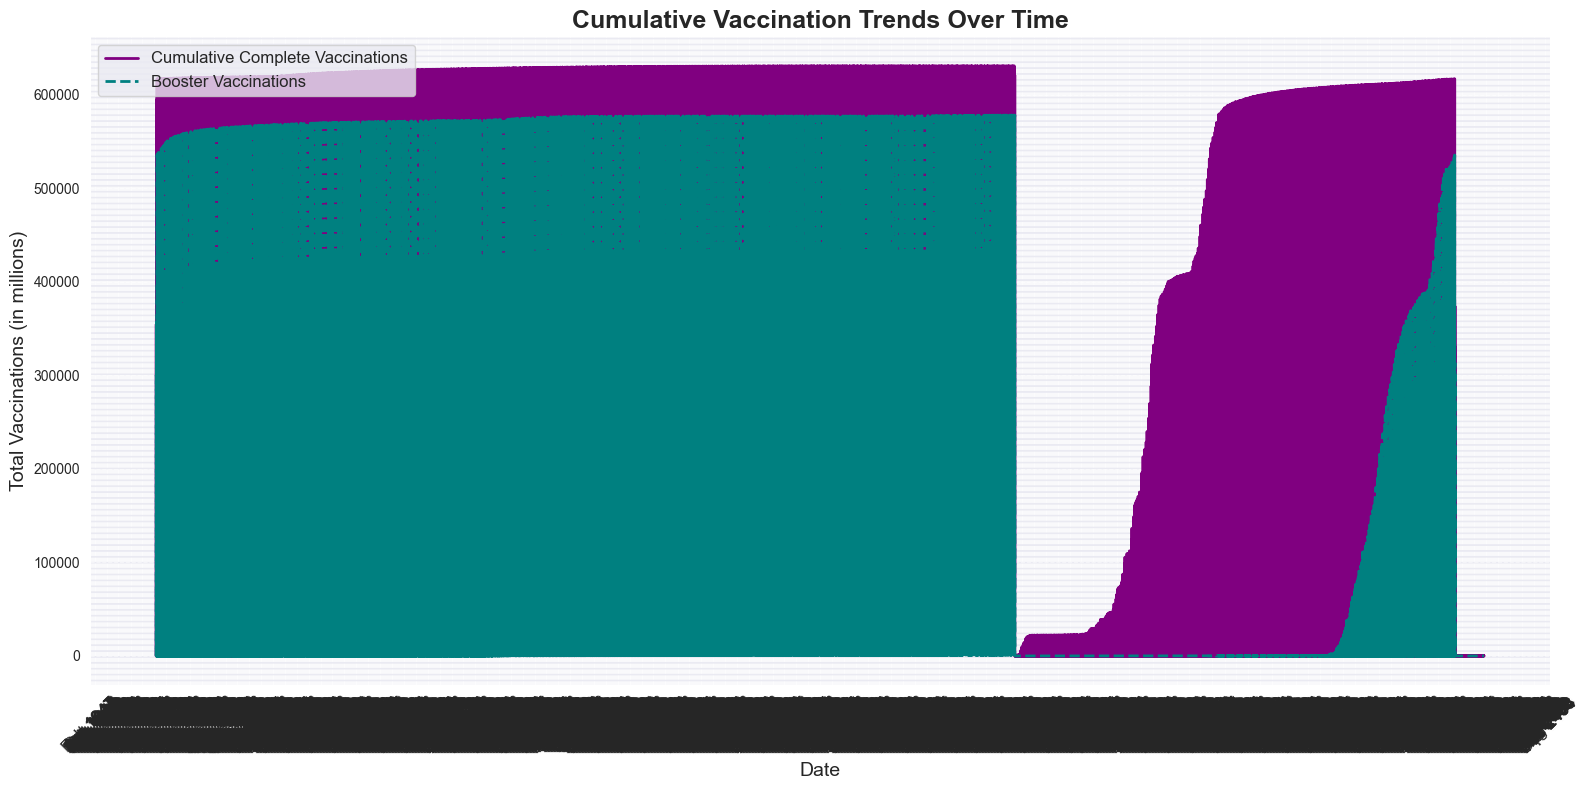

In [20]:
import matplotlib.dates as mdates

plt.figure(figsize=(16, 8))  # Increasing figure size for better spacing.

# Plotting the total vaccinations.
plt.plot(
    df.index,
    df['Cumulative_Complete'],
    label='Cumulative Complete Vaccinations',
    color='purple',
    linestyle='-',
    linewidth=2,
)

# Plotting the booster vaccinations.
plt.plot(
    df.index,
    df['Booster_Cumulative'],
    label='Booster Vaccinations',
    color='teal',
    linestyle='--',
    linewidth=2,
)

plt.title('Cumulative Vaccination Trends Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Total Vaccinations (in millions)', fontsize=14)

# Formatting x-axis.
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # month-year.
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Shows every 2 months.

plt.xticks(rotation=45, fontsize=12) # Rotating x-axis.

# Gridlines and legend.
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12, loc='upper left')

plt.tight_layout() # So its not squished
plt.show()

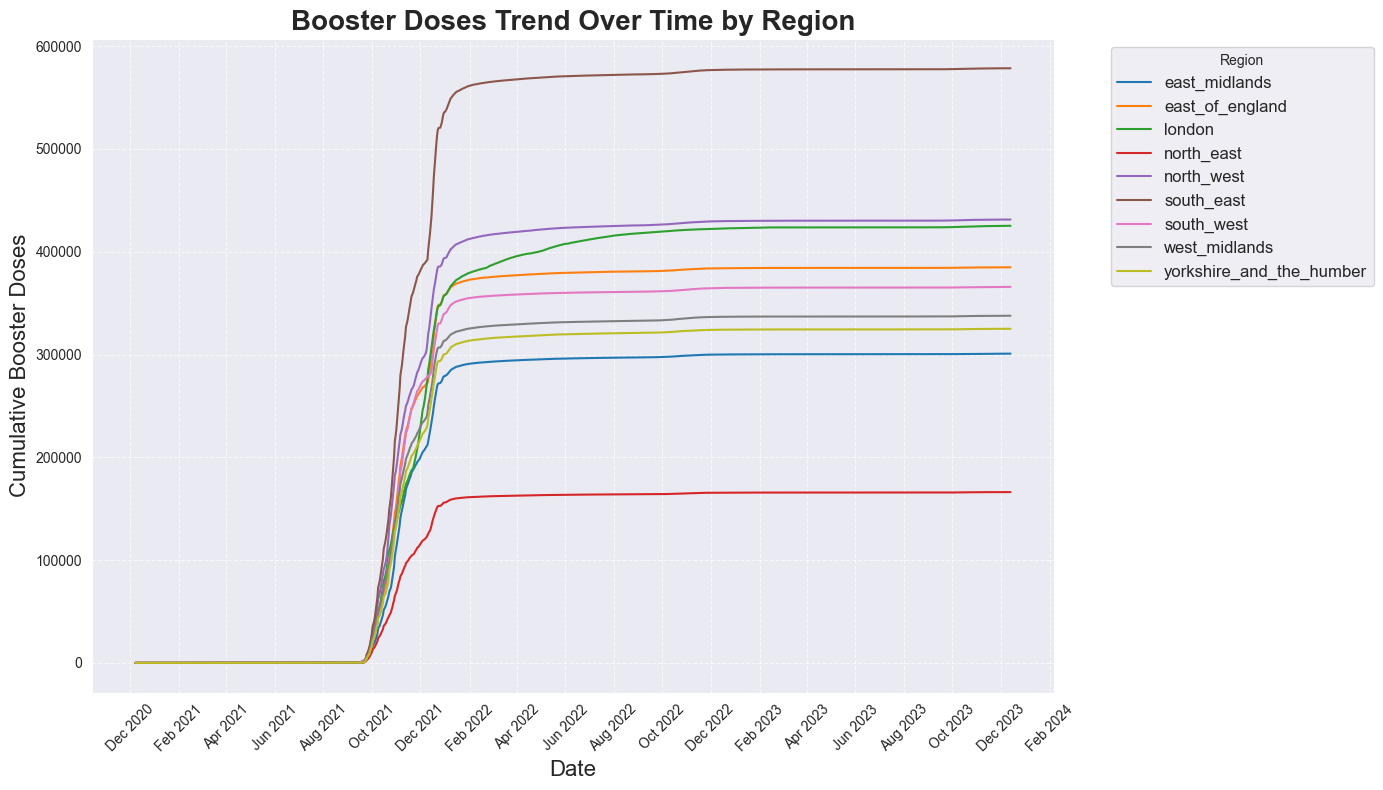

In [8]:
# Showing the Booster dose trends over time by region. First going to group the data by the date and region. 

booster_trend_by_region = df.groupby(['date', 'area_name'])['Booster_Cumulative'].max().reset_index()

# Pivot the data to have dates as rows and regions as columns.
booster_trend_pivot = booster_trend_by_region.pivot(index='date', columns='area_name', values='Booster_Cumulative')

# Plot
plt.figure(figsize=(14, 8))
for region in booster_trend_pivot.columns:
    plt.plot(
        booster_trend_pivot.index, booster_trend_pivot[region],
        label=region, linewidth=1.5
    )
plt.title('Booster Doses Trend Over Time by Region', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Cumulative Booster Doses', fontsize=16)

# Gridlines and legend
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(fontsize=12, title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjusting x-axis.
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



## VACCINATION COVERAGE 

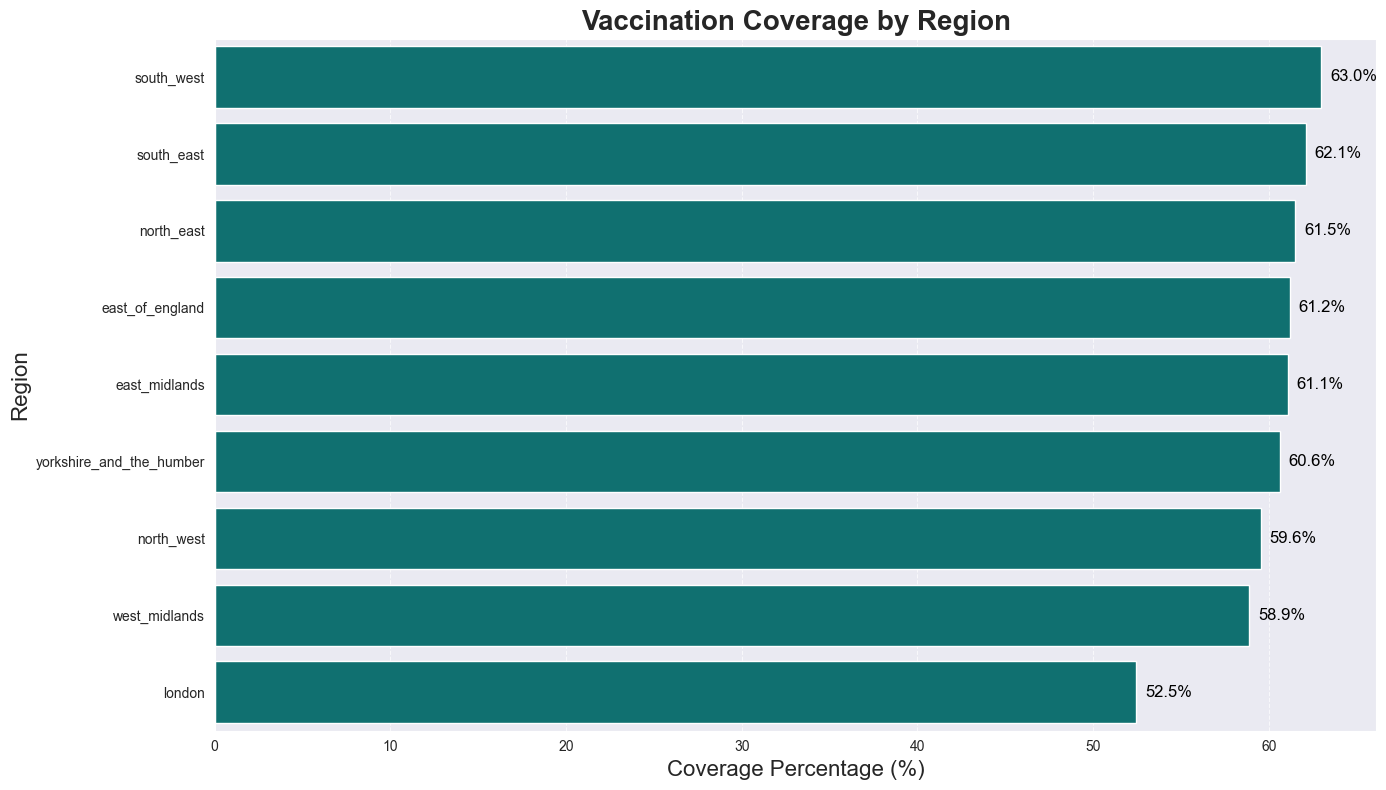

In [9]:

# Grouping the data by region and then using this to calculate the mean coverage percentage.
coverage_by_region = df.groupby('area_name')['Coverage_Percentage'].mean().reset_index()

# Sorting regions by coverage percentage.
coverage_by_region = coverage_by_region.sort_values(by='Coverage_Percentage', ascending=False)

# Plot
plt.figure(figsize=(14, 8)) 
sns.barplot(
    data=coverage_by_region,
    x='Coverage_Percentage',
    y='area_name',
    color='teal'
)
plt.title('Vaccination Coverage by Region', fontsize=20, fontweight='bold')
plt.xlabel('Coverage Percentage (%)', fontsize=16)
plt.ylabel('Region', fontsize=16)

# Value labels to the bars
for index, value in enumerate(coverage_by_region['Coverage_Percentage']):
    plt.text(
        value + 0.5,  
        index,        
        f'{value:.1f}%',  
        fontsize=12,
        va='center',  
        color='black'  
    )
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.tight_layout() 
plt.show()


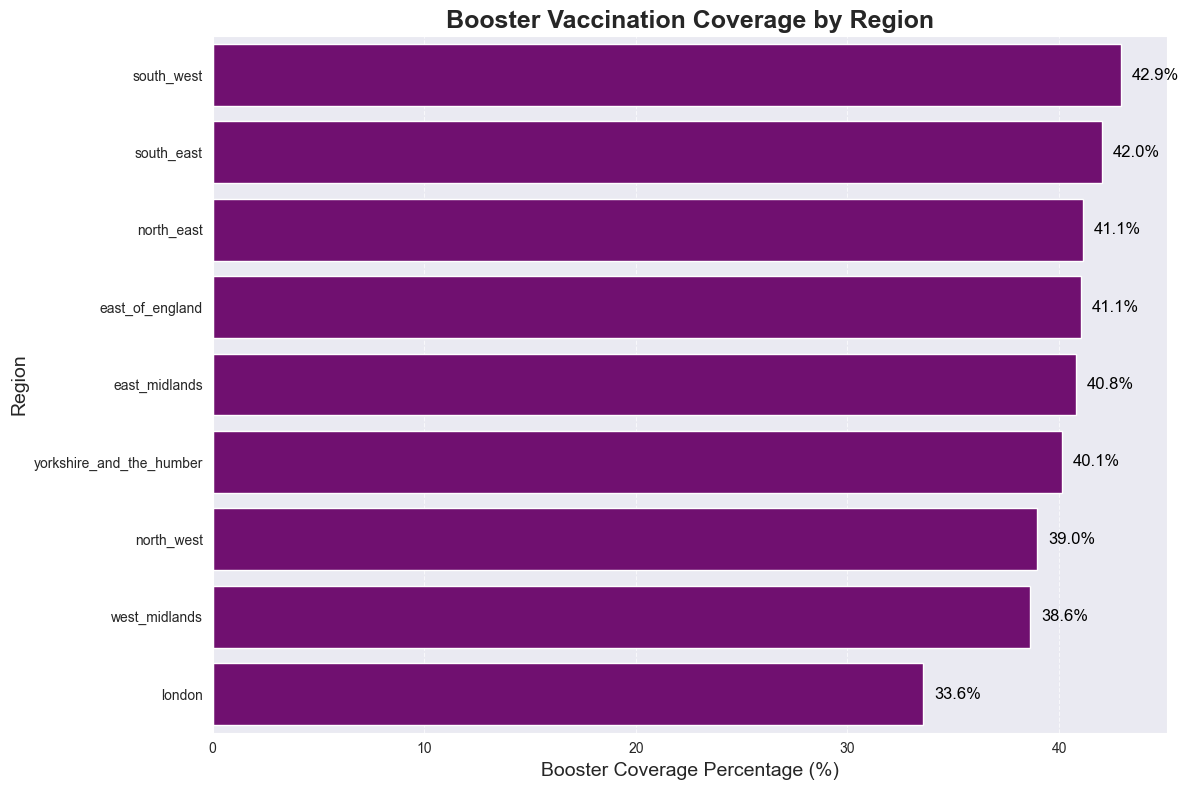

In [10]:

booster_by_region = df.groupby('area_name')['Booster_Percentage'].mean().reset_index()
booster_by_region = booster_by_region.sort_values(by='Booster_Percentage', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=booster_by_region,
    x='Booster_Percentage',
    y='area_name',
    color='purple'  
)
plt.title('Booster Vaccination Coverage by Region', fontsize=18, fontweight='bold')
plt.xlabel('Booster Coverage Percentage (%)', fontsize=14)
plt.ylabel('Region', fontsize=14)

for index, value in enumerate(booster_by_region['Booster_Percentage']):
    plt.text(
        value + 0.5,  
        index,        
        f'{value:.1f}%',  
        fontsize=12,
        va='center',
        color='black'  
    )
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.tight_layout() 
plt.show()


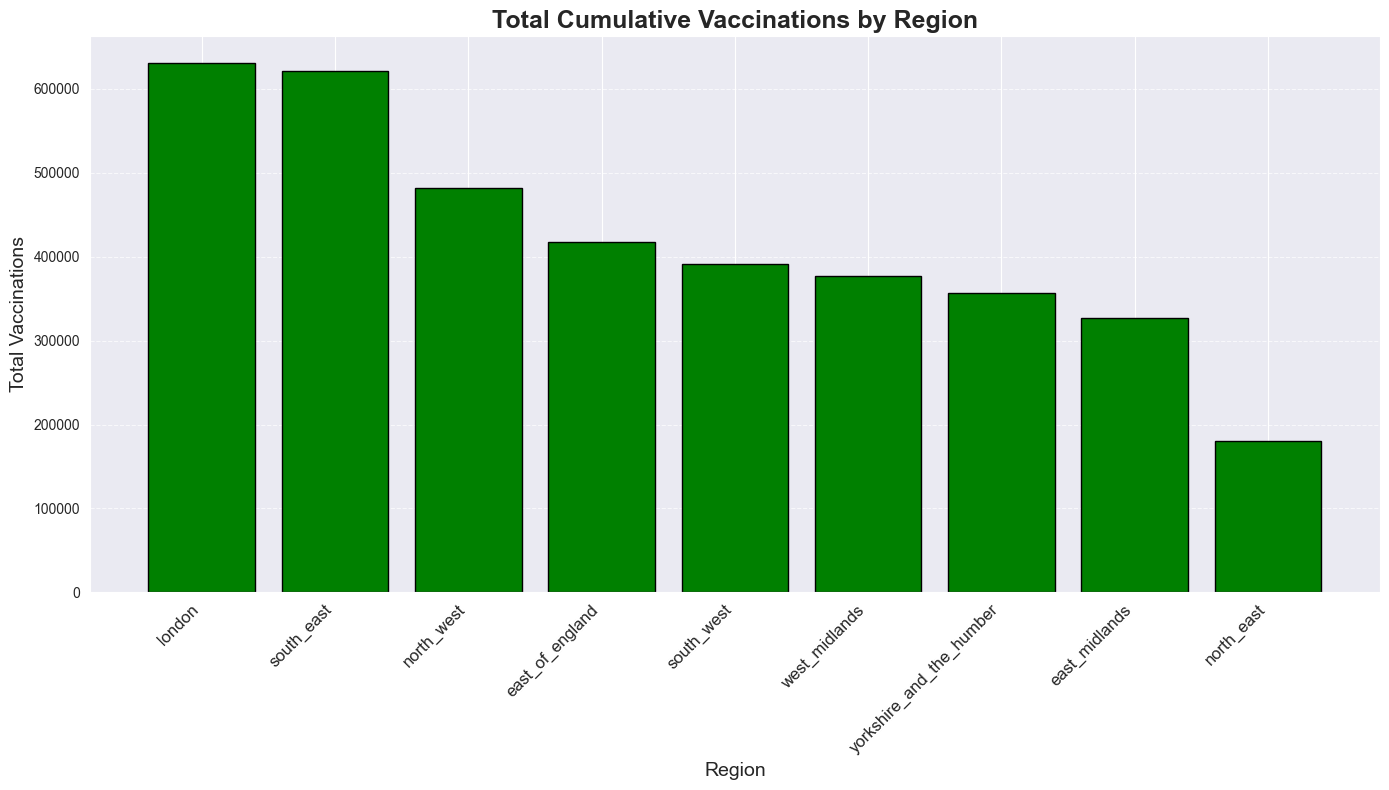

In [11]:
# Group data by region and extract the final cumulative value.
cumulative_vaccinations_by_region = df.groupby('area_name')['Cumulative_Complete'].max().reset_index()

# Sort by total cumulative vaccinations.
cumulative_vaccinations_by_region = cumulative_vaccinations_by_region.sort_values(by='Cumulative_Complete', ascending=False)

# Plot 
plt.figure(figsize=(14, 8))
plt.bar(
    x=cumulative_vaccinations_by_region['area_name'],
    height=cumulative_vaccinations_by_region['Cumulative_Complete'],
    color='green',
    edgecolor='black'
)
plt.title('Total Cumulative Vaccinations by Region', fontsize=18, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Vaccinations', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


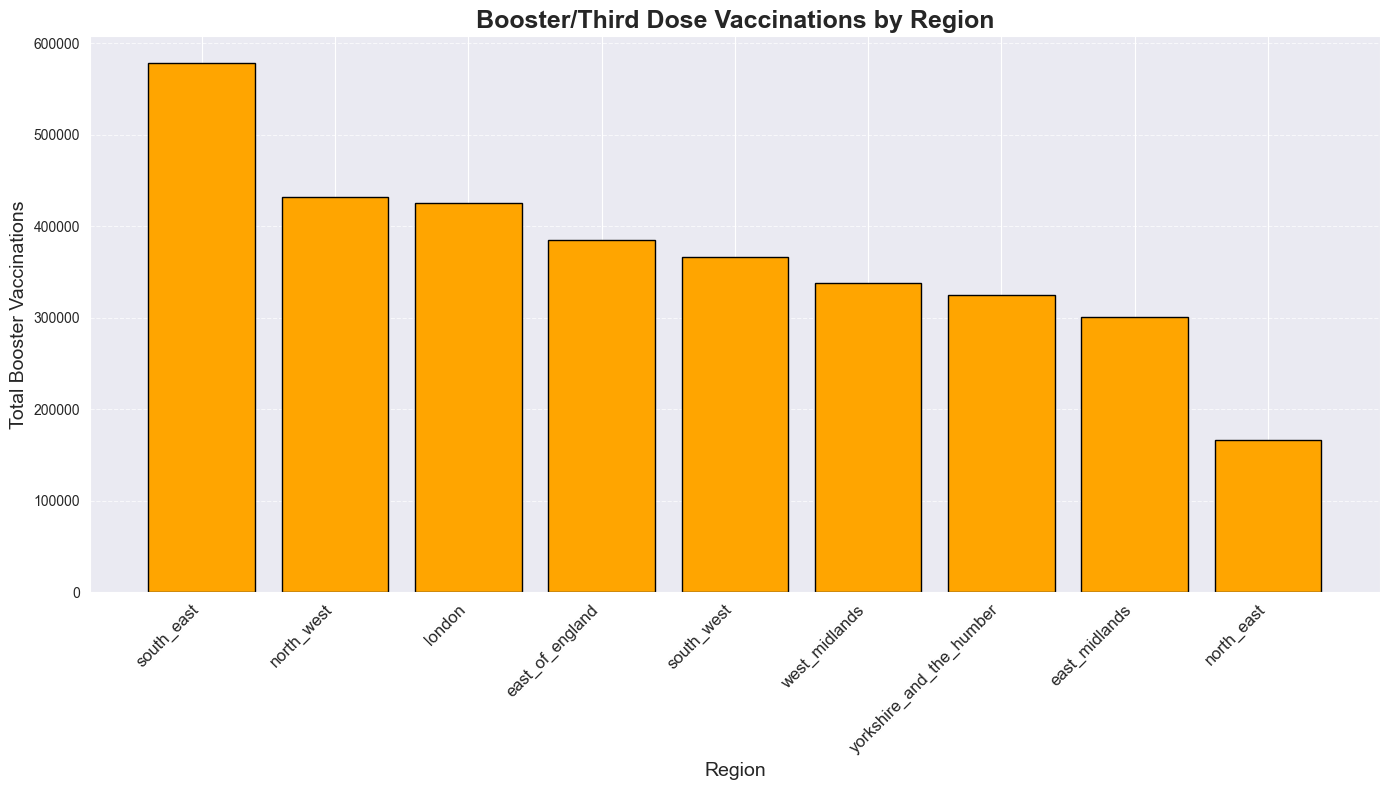

In [12]:
# Grouping data by region and extracting the maximum booster cumulative value.
booster_vaccinations_by_region = df.groupby('area_name')['Booster_Cumulative'].max().reset_index()

# Sorting by total booster vaccinations.
booster_vaccinations_by_region = booster_vaccinations_by_region.sort_values(by='Booster_Cumulative', ascending=False)

# Plot
plt.figure(figsize=(14, 8))
plt.bar(
    x=booster_vaccinations_by_region['area_name'],
    height=booster_vaccinations_by_region['Booster_Cumulative'],
    color='orange',
    edgecolor='black'
)
plt.title('Booster/Third Dose Vaccinations by Region', fontsize=18, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Booster Vaccinations', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## VACCINATION BY AGE GROUP 

<Figure size 1600x900 with 0 Axes>

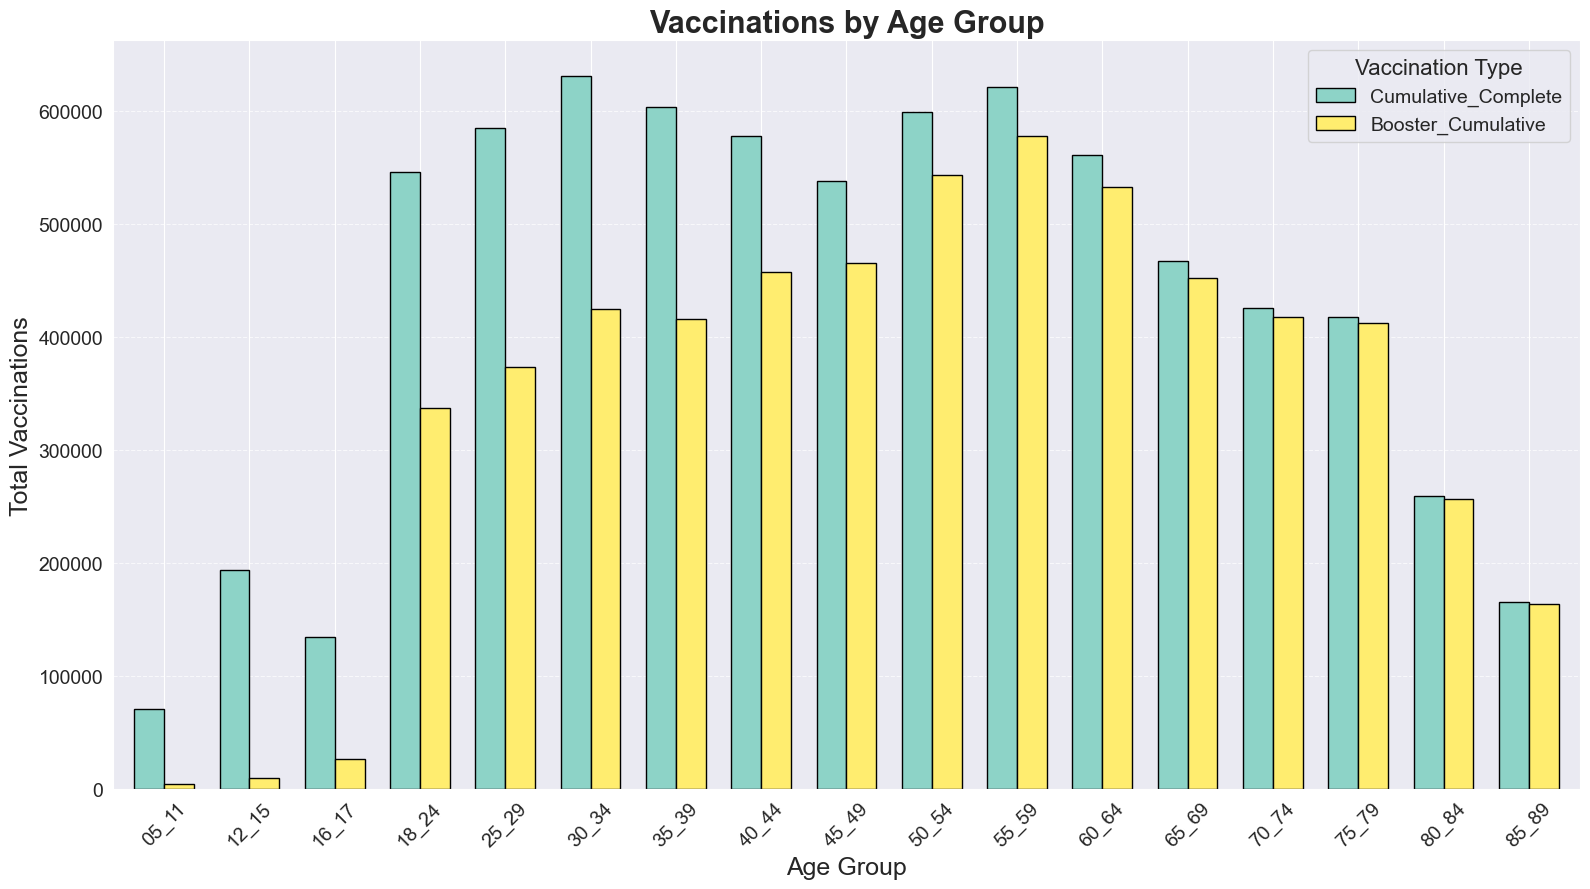

In [13]:
# Grouping data.
age_vaccinations = df.groupby('age', observed=False)[['Cumulative_Complete', 'Booster_Cumulative']].max()

# Sorting the age groups.
age_vaccinations = age_vaccinations.sort_index()

plt.figure(figsize=(16, 9))  
age_vaccinations.plot(
    kind='bar',
    figsize=(16, 9),
    width=0.7,  
    edgecolor='black',
    colormap='Set3'  
)
plt.title('Vaccinations by Age Group', fontsize=22, fontweight='bold')
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('Total Vaccinations', fontsize=18)
plt.legend(
    title='Vaccination Type',
    fontsize=14,
    title_fontsize=16,
    loc='upper right'
)

plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## SEASONAL VACCINATION TOTALS 

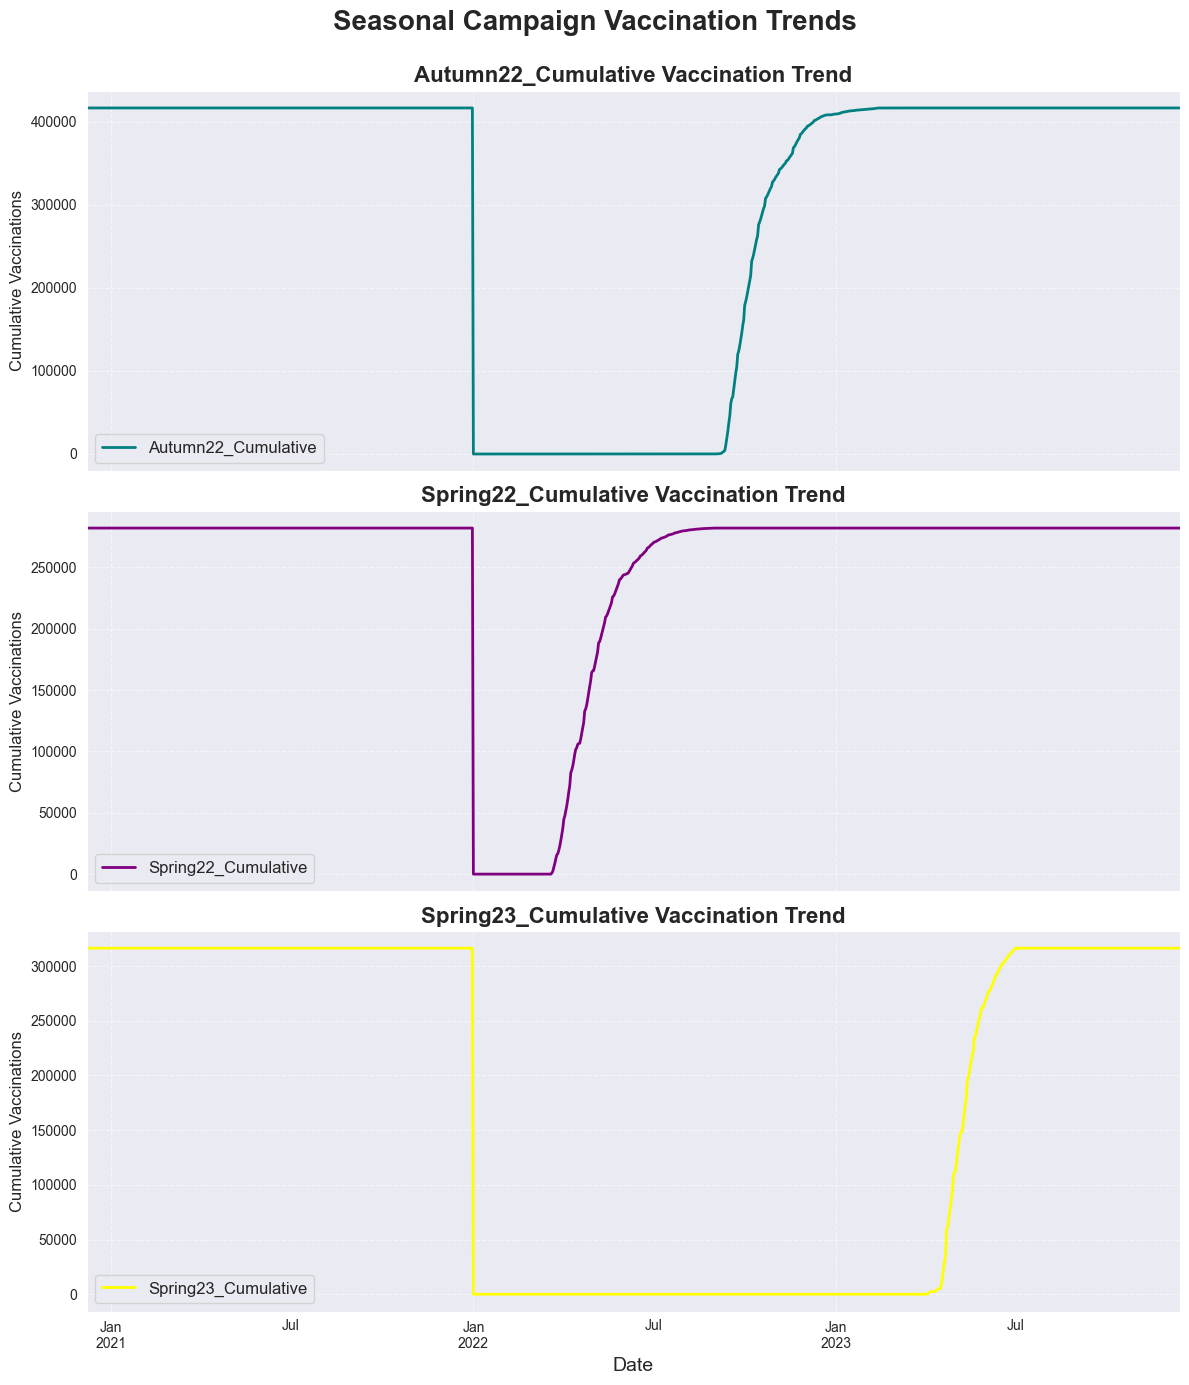

In [14]:
# Grouping data by date and sum seasonal vaccination totals.
seasonal_trends = df.groupby('date')[['Autumn22_Cumulative', 'Spring22_Cumulative', 'Spring23_Cumulative']].max()

colors = ['teal', 'purple', 'yellow']  

# Creating subplots for each season.
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15), sharex=True)

# Ploting each season on a separate subplot.
for ax, (season, color) in zip(axes, zip(seasonal_trends.columns, colors)):
    seasonal_trends[season].plot(
        ax=ax, color=color, linewidth=2, label=season
    )
    ax.set_title(f'{season} Vaccination Trend', fontsize=16, fontweight='bold')
    ax.set_ylabel('Cumulative Vaccinations', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(fontsize=12)

# Shared x-axis label.
plt.xlabel('Date', fontsize=14)

# Main title 
fig.suptitle('Seasonal Campaign Vaccination Trends', fontsize=20, fontweight='bold', y=0.92)

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


<Figure size 1400x800 with 0 Axes>

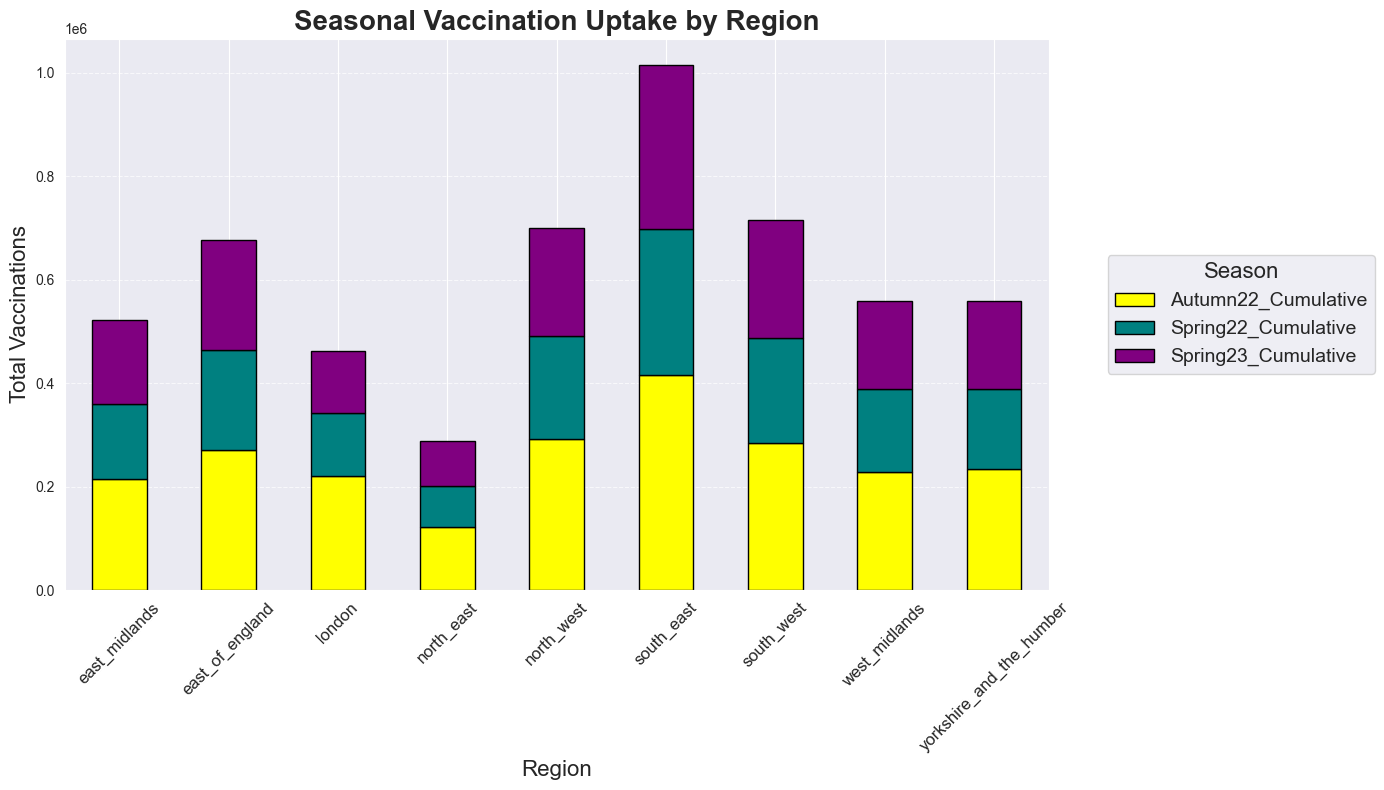

In [15]:
# Grouping data by region and taking the maximum cumulative value for each season.
seasonal_vaccinations_by_region = df.groupby('area_name')[['Autumn22_Cumulative', 'Spring22_Cumulative', 'Spring23_Cumulative']].max()

plt.figure(figsize=(14, 8))
seasonal_vaccinations_by_region.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color=['yellow', 'teal', 'purple'],  
    edgecolor='black'
)

plt.title('Seasonal Vaccination Uptake by Region', fontsize=20, fontweight='bold')
plt.xlabel('Region', fontsize=16)
plt.ylabel('Total Vaccinations', fontsize=16)

plt.xticks(rotation=45, fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(
    title='Season',
    fontsize=14,
    title_fontsize=16,
    loc='center left',
    bbox_to_anchor=(1.05, 0.5)  
)
plt.tight_layout()
plt.show()


## DAILY VACCINATION TRENDS 

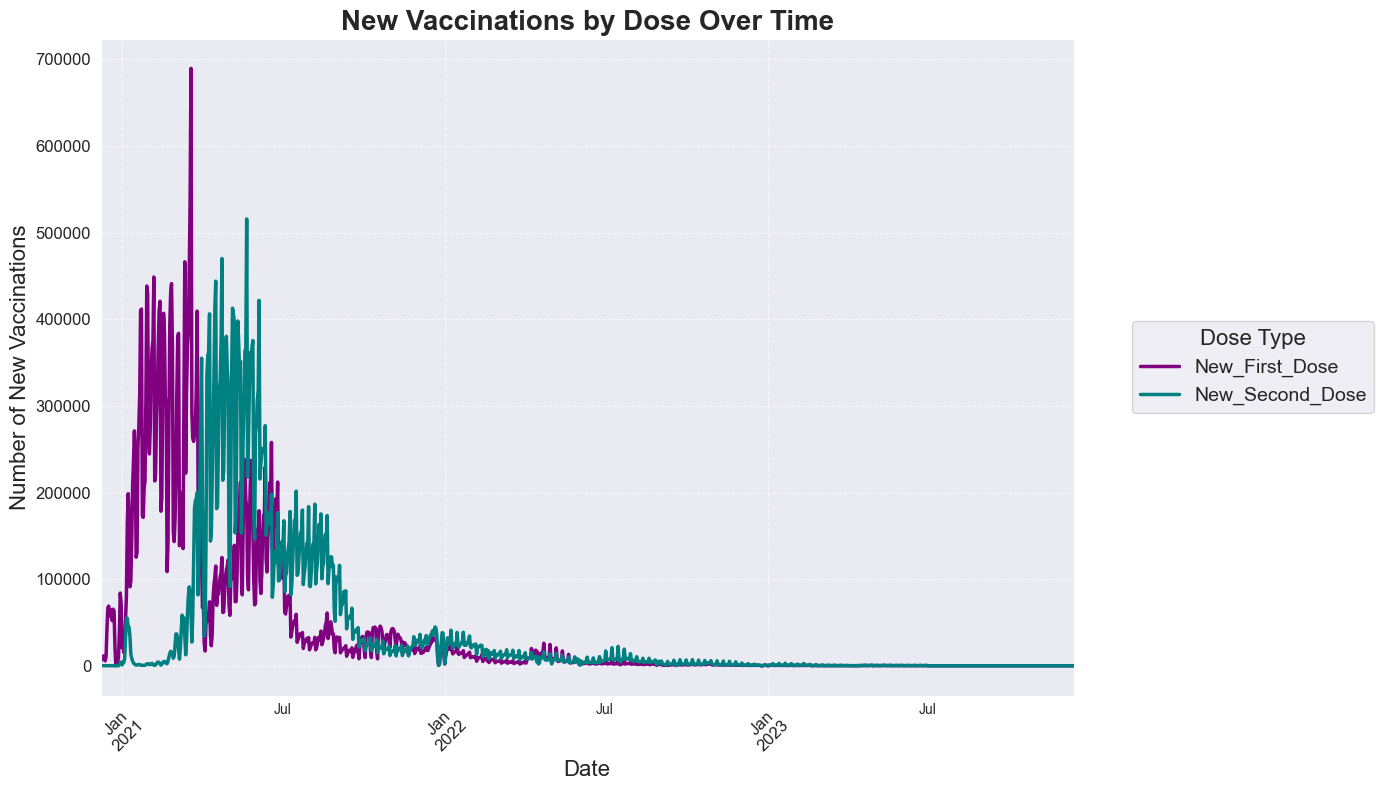

In [16]:
new_vaccinations_trends = df.groupby('date')[['New_First_Dose', 'New_Second_Dose']].sum()
custom_colors = ['purple', 'teal'] 

# Plot
plt.figure(figsize=(14, 8))
new_vaccinations_trends.plot(
    ax=plt.gca(),
    linewidth=2.5,
    color=custom_colors
)
plt.title('New Vaccinations by Dose Over Time', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of New Vaccinations', fontsize=16)

plt.legend(
    title='Dose Type',
    fontsize=14,
    title_fontsize=16,
    loc='center left',  
    bbox_to_anchor=(1.05, 0.5) 
)
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


<Figure size 1600x1000 with 0 Axes>

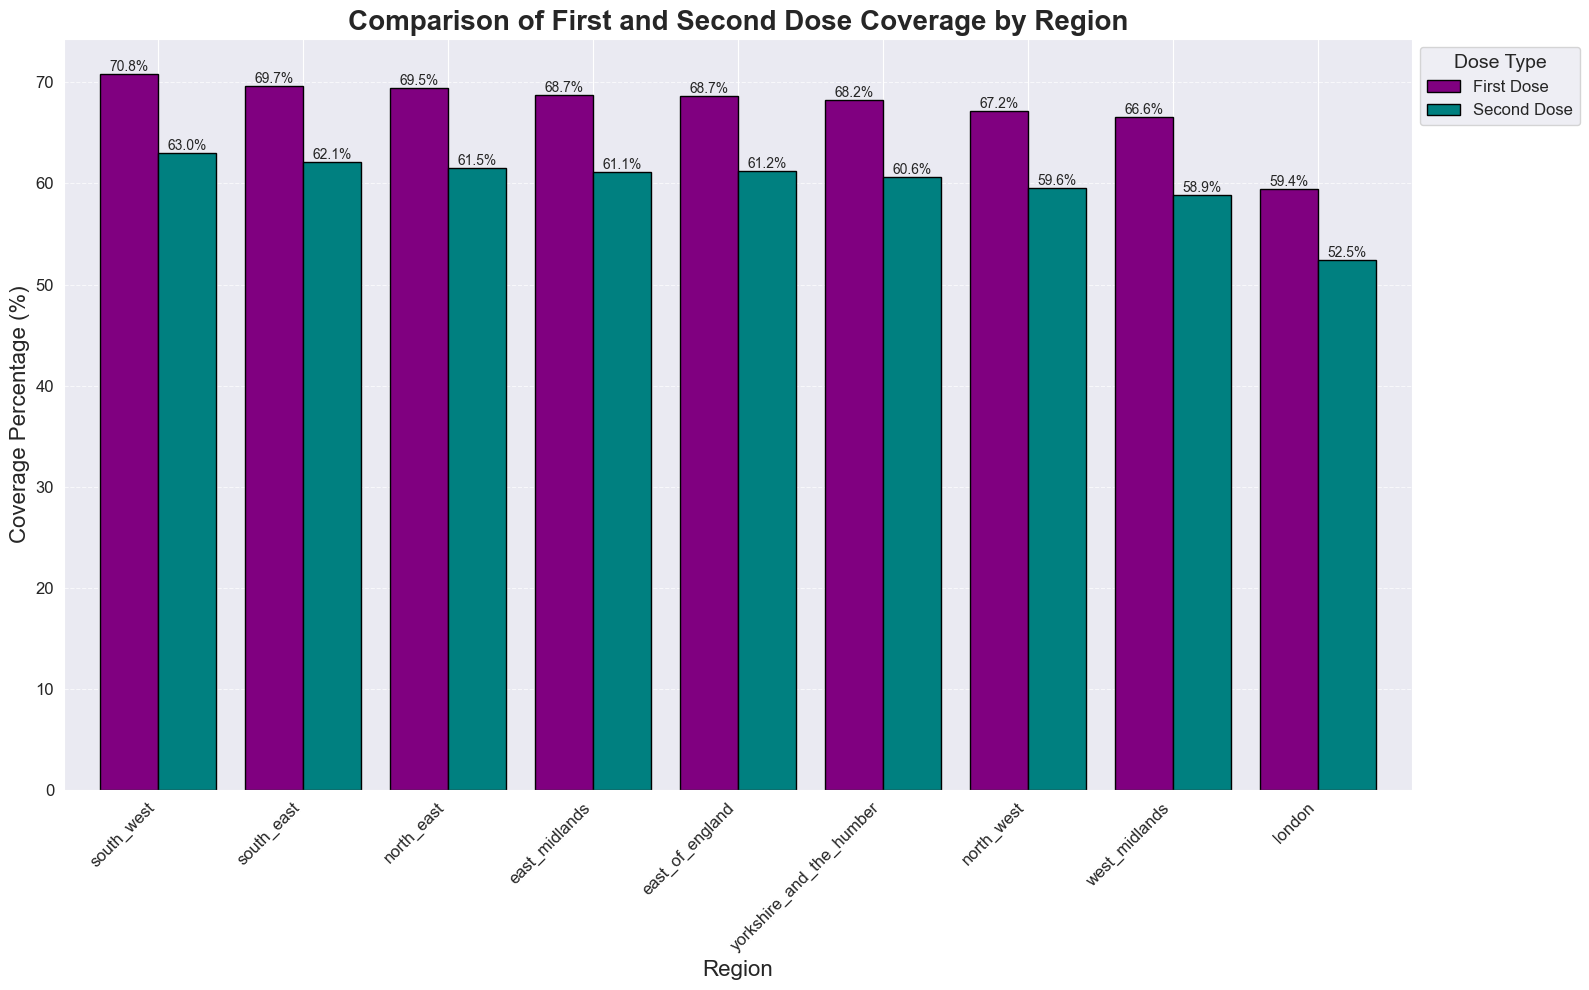

In [17]:
# Group data by region and calculate mean first and second dose percentages.
dose_coverage_by_region = df.groupby('area_name')[['First_Dose_Percentage', 'Second_Dose_Percentage']].mean().reset_index()

# Sort by first dose coverage.
dose_coverage_by_region = dose_coverage_by_region.sort_values(by='First_Dose_Percentage', ascending=False)

# Plot bar chart to compare first and second dose coverage.
plt.figure(figsize=(16, 10))
dose_coverage_by_region.plot(
    x='area_name',
    kind='bar',
    stacked=False,
    figsize=(16, 10),
    color=['purple', 'teal'], 
    edgecolor='black',
    width=0.8
)

# Add percentage labels to bars.
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)

plt.title('Comparison of First and Second Dose Coverage by Region', fontsize=20, fontweight='bold')
plt.xlabel('Region', fontsize=16)
plt.ylabel('Coverage Percentage (%)', fontsize=16)

plt.legend(
    ['First Dose', 'Second Dose'],
    title='Dose Type',
    fontsize=12,
    title_fontsize=14,
    loc='upper left',
    bbox_to_anchor=(1, 1)  
)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## DISTRIBUTION OF VACCINATIONS 

The histogram plots the distribution of vaccination coverage percentages across regions or groups within the dataset. 


Have added a Kernel Density Estimation line. This allows for estimations of the underlying probability density of the data. It highlights the overall shape of the distrubtion, showing peaks and the spread of the data. 


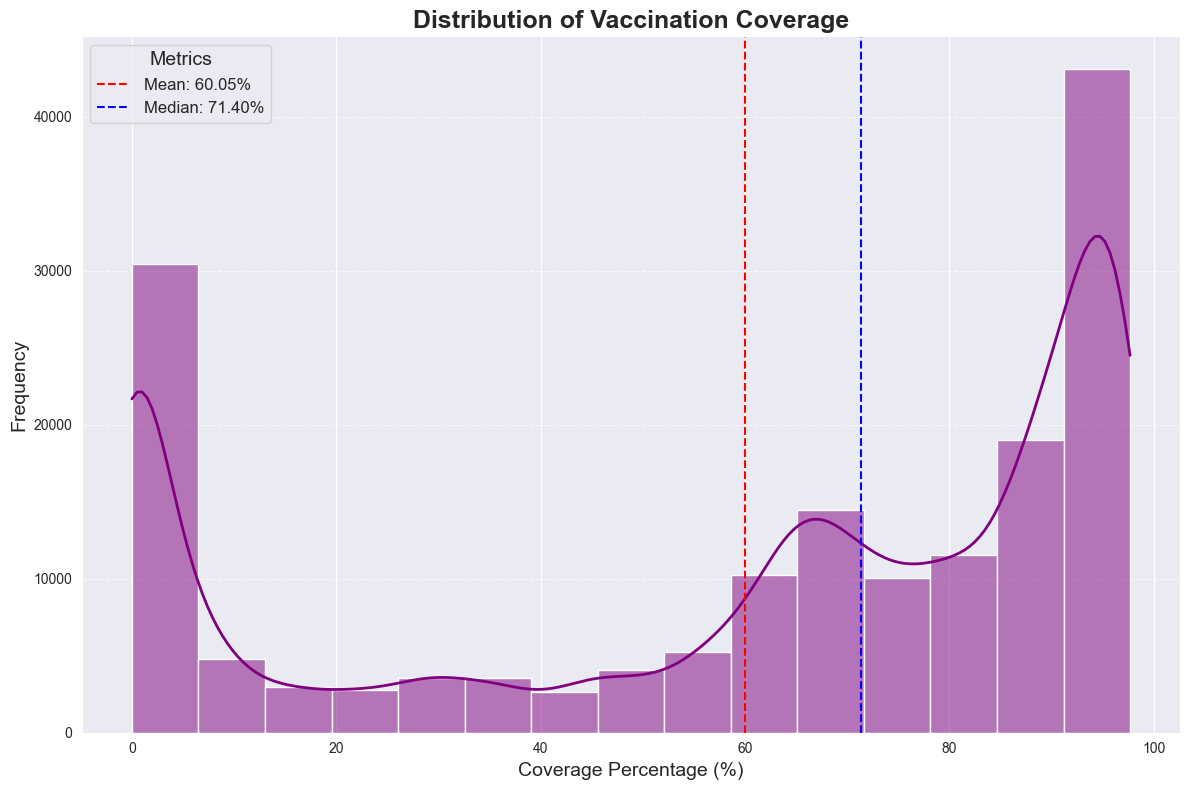

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot.
plt.figure(figsize=(12, 8))
sns.histplot(
    df['Coverage_Percentage'],
    bins=15,  
    kde=True,  
    color='purple',  
    line_kws={'color': 'teal', 'linewidth': 2} 
)

# Adding mean and median lines.
mean_coverage = df['Coverage_Percentage'].mean()
median_coverage = df['Coverage_Percentage'].median()
plt.axvline(mean_coverage, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_coverage:.2f}%')
plt.axvline(median_coverage, color='blue', linestyle='--', linewidth=1.5, label=f'Median: {median_coverage:.2f}%')


plt.title('Distribution of Vaccination Coverage', fontsize=18, fontweight='bold')
plt.xlabel('Coverage Percentage (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.legend(fontsize=12, title='Metrics', title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


## PROPORTION OF VACCINATED VS UNVACCINATED 

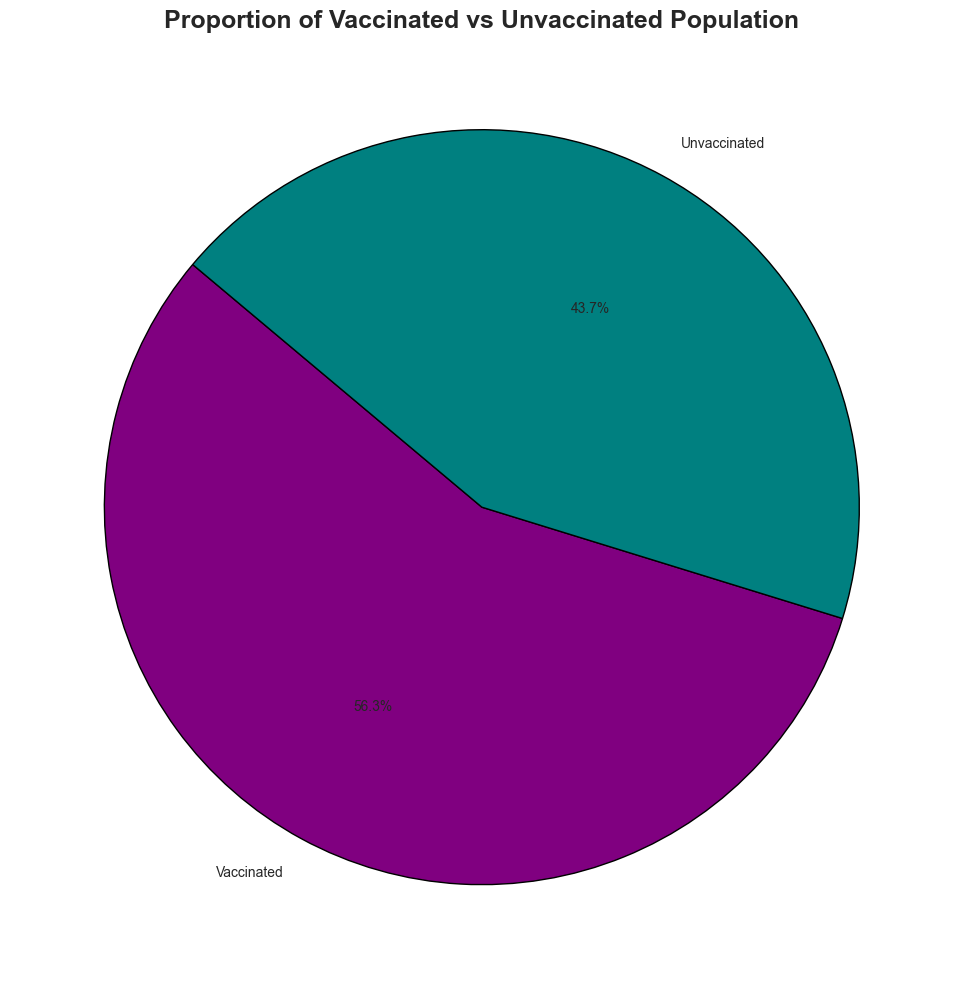

In [19]:
# Calculating totals.
total_population = df['Eligible_Population'].sum()
total_vaccinated = df['Cumulative_Complete'].sum()
total_unvaccinated = total_population - total_vaccinated

data = [total_vaccinated, total_unvaccinated]
labels = ['Vaccinated', 'Unvaccinated']

# Plot.
plt.figure(figsize=(10, 10))
plt.pie(
    data,
    labels=labels,
    autopct='%1.1f%%', 
    startangle=140,
    colors=['purple', 'teal'],  
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  
)
plt.title('Proportion of Vaccinated vs Unvaccinated Population', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

